In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\Uber-Jan-Feb-FOIL.csv")
data.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [9]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [11]:
print(data.columns)


Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [14]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extracting useful information
data['Hour'] = data['date'].dt.hour
data['Day'] = data['date'].dt.day
data['DayOfWeek'] = data['date'].dt.dayofweek
data['Month'] = data['date'].dt.month



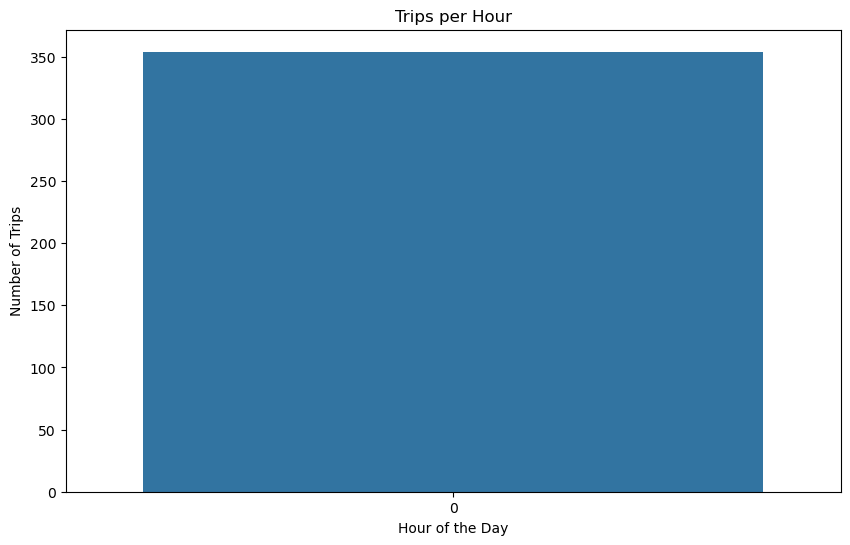

In [16]:
# Exploratory Data Analysis
# Plotting the number of trips per hour
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=data)
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

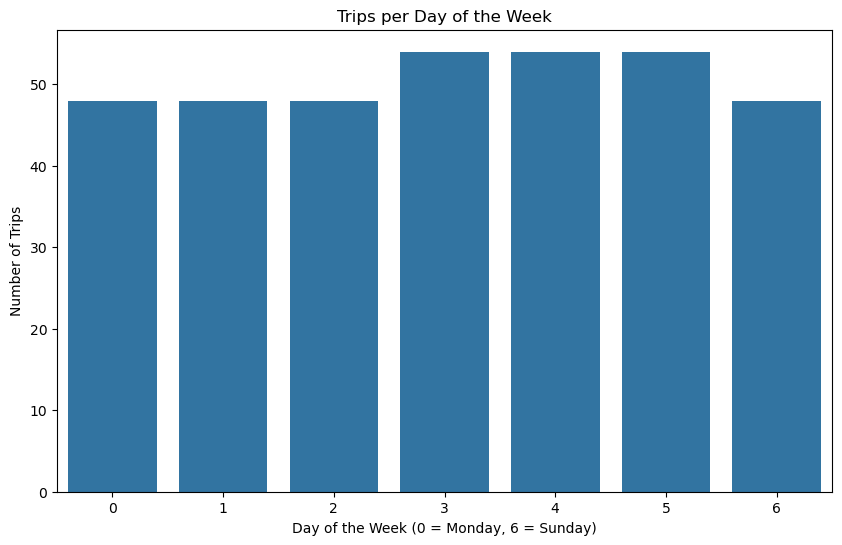

In [17]:
# Plotting the number of trips per day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=data)
plt.title('Trips per Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Trips')
plt.show()


In [18]:
# Feature Engineering
# Create dummy variables for categorical features
data = pd.get_dummies(data, columns=['dispatching_base_number'], drop_first=True)


In [19]:
# Define features and target variable
X = data[['Day', 'DayOfWeek', 'Month', 'active_vehicles']]
y = data['trips']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


In [21]:
# Model Building
# Train a Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Predict on the test set
y_pred = rfr.predict(X_test)

In [23]:
# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1537730.8520654202
R^2 Score: 0.9872081897543957


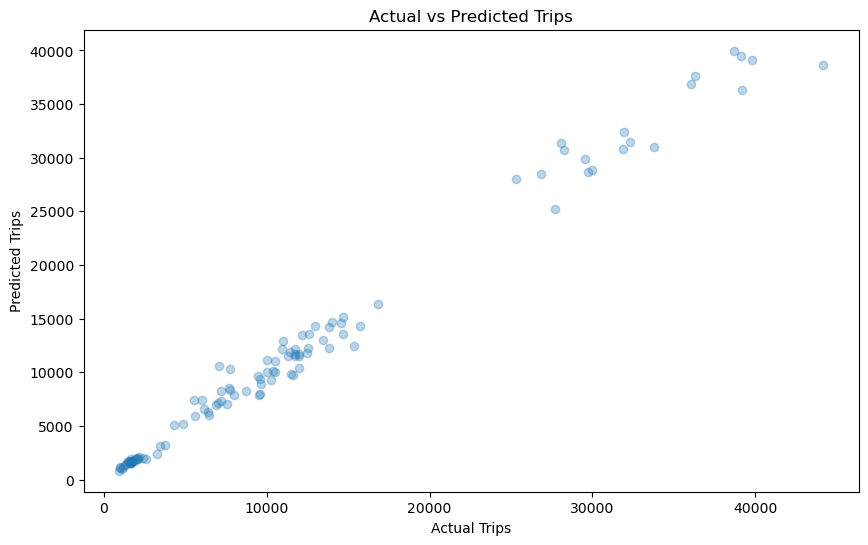

In [24]:
# Visualization of Predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()
